In [1]:
#import needed libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data user_day
df1=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_day.csv', encoding='utf-8-sig', engine='python')
df1.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse


In [3]:
#read the data user_cpi
df2=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_cpi.csv', encoding='utf-8-sig', engine='python')
df2.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.26,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.00,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.26,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.26,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.26,My Lovely Horse


In [4]:
#merge the dataframes 
frames = [df1, df2]
df3= pd.merge(df1, df2, how="left", on=["player_id", "game"])
df3.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse,2019-09-15,Organic,0.00
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse,2019-08-02,Paid,0.26
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00


In [5]:
#select 'Bruteville' game data
df4=df3.loc[df3['game'] == 'Bruteville']
df4.sample(5)

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
1513853,57ae4505ce284cb8d791a817fd03c8eb,2019-04-01,0.00,0.00,Bruteville,2019-03-27,Organic,0.00
1736759,c1cad6bf41f6dcec0307b8e7b388180e,2019-05-03,0.00,0.00,Bruteville,2019-04-13,Paid,0.00
1667684,d2001a089130648abf1c89eae24b1b58,2019-04-17,0.00,0.04,Bruteville,2019-03-18,Paid,0.56
1686478,5b9496499aac6015c59eb3457ff49866,2019-05-01,0.00,0.05,Bruteville,2019-04-26,Organic,0.00
1710228,8d3e48927c41810d8a86a813446aef23,2019-04-26,0.00,0.04,Bruteville,2019-04-17,Paid,1.55


In [6]:
#check data type and size
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526541 entries, 1339974 to 1866514
Data columns (total 8 columns):
player_id           526541 non-null object
event_date          526541 non-null object
iap_revenue         526541 non-null float64
video_ad_revenue    526541 non-null float64
game                526541 non-null object
install_date        526541 non-null object
network_name        526541 non-null object
cpi                 526541 non-null float64
dtypes: float64(3), object(5)
memory usage: 36.2+ MB


In [7]:
#check numerical fields
df4.describe()

,iap_revenue,video_ad_revenue,cpi
count,"526,541.00","526,541.00","526,541.00"
mean,0.08,0.04,1.07
std,1.58,0.16,0.94
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,1.44
75%,0.00,0.06,1.73
max,265.29,41.26,29.21


In [8]:
#check categorical fields
df4_categorical=df4.select_dtypes(include=['object']).copy()
print(df4_categorical.describe())

                               player_id  event_date        game install_date  \
count                             526541      526541      526541       526541   
unique                            100650          91           1           91   
top     c9892e2a38d747dd210e9a799a6b3205  2019-04-14  Bruteville   2019-04-14   
freq                                  91       16080      526541        18336   

       network_name  
count        526541  
unique            2  
top            Paid  
freq         384429  


In [9]:
#create cohorts based on install_date 
grouped = df4.groupby(['install_date','event_date'])
cohorts = grouped.agg({'player_id': pd.Series.nunique})
cohorts.rename(columns={'player_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
install_date event_date            
2019-02-21   2019-02-21         713
             2019-02-22         363
             2019-02-23         278
             2019-02-24         220
             2019-02-25         196

In [10]:
#Create a `CohortPeriod` column, which is the Nth period based on the user's login date.
def cohort_period(df4):
    df4['CohortPeriod'] = np.arange(len(df4)) 
    return df4

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
install_date event_date                          
2019-02-21   2019-02-21         713             0
             2019-02-22         363             1
             2019-02-23         278             2
             2019-02-24         220             3
             2019-02-25         196             4

In [11]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['install_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

install_date
2019-02-21     713
2019-02-22    1090
2019-02-23    1502
2019-02-24    1426
2019-02-25    1600
Name: TotalUsers, dtype: int64

In [12]:
cohorts['TotalUsers'].head()

install_date  CohortPeriod
2019-02-21    0               713
              1               363
              2               278
              3               220
              4               196
Name: TotalUsers, dtype: int64

In [13]:
cohorts['TotalUsers'].unstack(1).head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-02-21,713.00,363.00,278.00,220.00,196.00,180.00,143.00,136.00,126.00,105.00,...,29.00,23.00,25.00,29.00,26.00,22.00,22.00,25.00,23.00,22.00
2019-02-22,"1,090.00",607.00,463.00,374.00,315.00,277.00,260.00,242.00,222.00,202.00,...,45.00,44.00,36.00,39.00,37.00,33.00,41.00,35.00,34.00,nan
2019-02-23,"1,502.00",821.00,602.00,509.00,390.00,370.00,344.00,319.00,300.00,279.00,...,60.00,60.00,51.00,55.00,51.00,48.00,53.00,51.00,nan,nan
2019-02-24,"1,426.00",764.00,581.00,456.00,389.00,360.00,293.00,306.00,293.00,255.00,...,53.00,53.00,45.00,49.00,51.00,49.00,51.00,nan,nan,nan
2019-02-25,"1,600.00",840.00,562.00,466.00,414.00,352.00,338.00,334.00,299.00,268.00,...,51.00,60.00,56.00,59.00,56.00,50.00,nan,nan,nan,nan


In [14]:
#create user retention rates
user_retention = cohorts['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0)
user_retention.head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-02-21,1.00,0.51,0.39,0.31,0.27,0.25,0.20,0.19,0.18,0.15,...,0.04,0.03,0.04,0.04,0.04,0.03,0.03,0.04,0.03,0.03
2019-02-22,1.00,0.56,0.42,0.34,0.29,0.25,0.24,0.22,0.20,0.19,...,0.04,0.04,0.03,0.04,0.03,0.03,0.04,0.03,0.03,nan
2019-02-23,1.00,0.55,0.40,0.34,0.26,0.25,0.23,0.21,0.20,0.19,...,0.04,0.04,0.03,0.04,0.03,0.03,0.04,0.03,nan,nan
2019-02-24,1.00,0.54,0.41,0.32,0.27,0.25,0.21,0.21,0.21,0.18,...,0.04,0.04,0.03,0.03,0.04,0.03,0.04,nan,nan,nan
2019-02-25,1.00,0.53,0.35,0.29,0.26,0.22,0.21,0.21,0.19,0.17,...,0.03,0.04,0.04,0.04,0.04,0.03,nan,nan,nan,nan


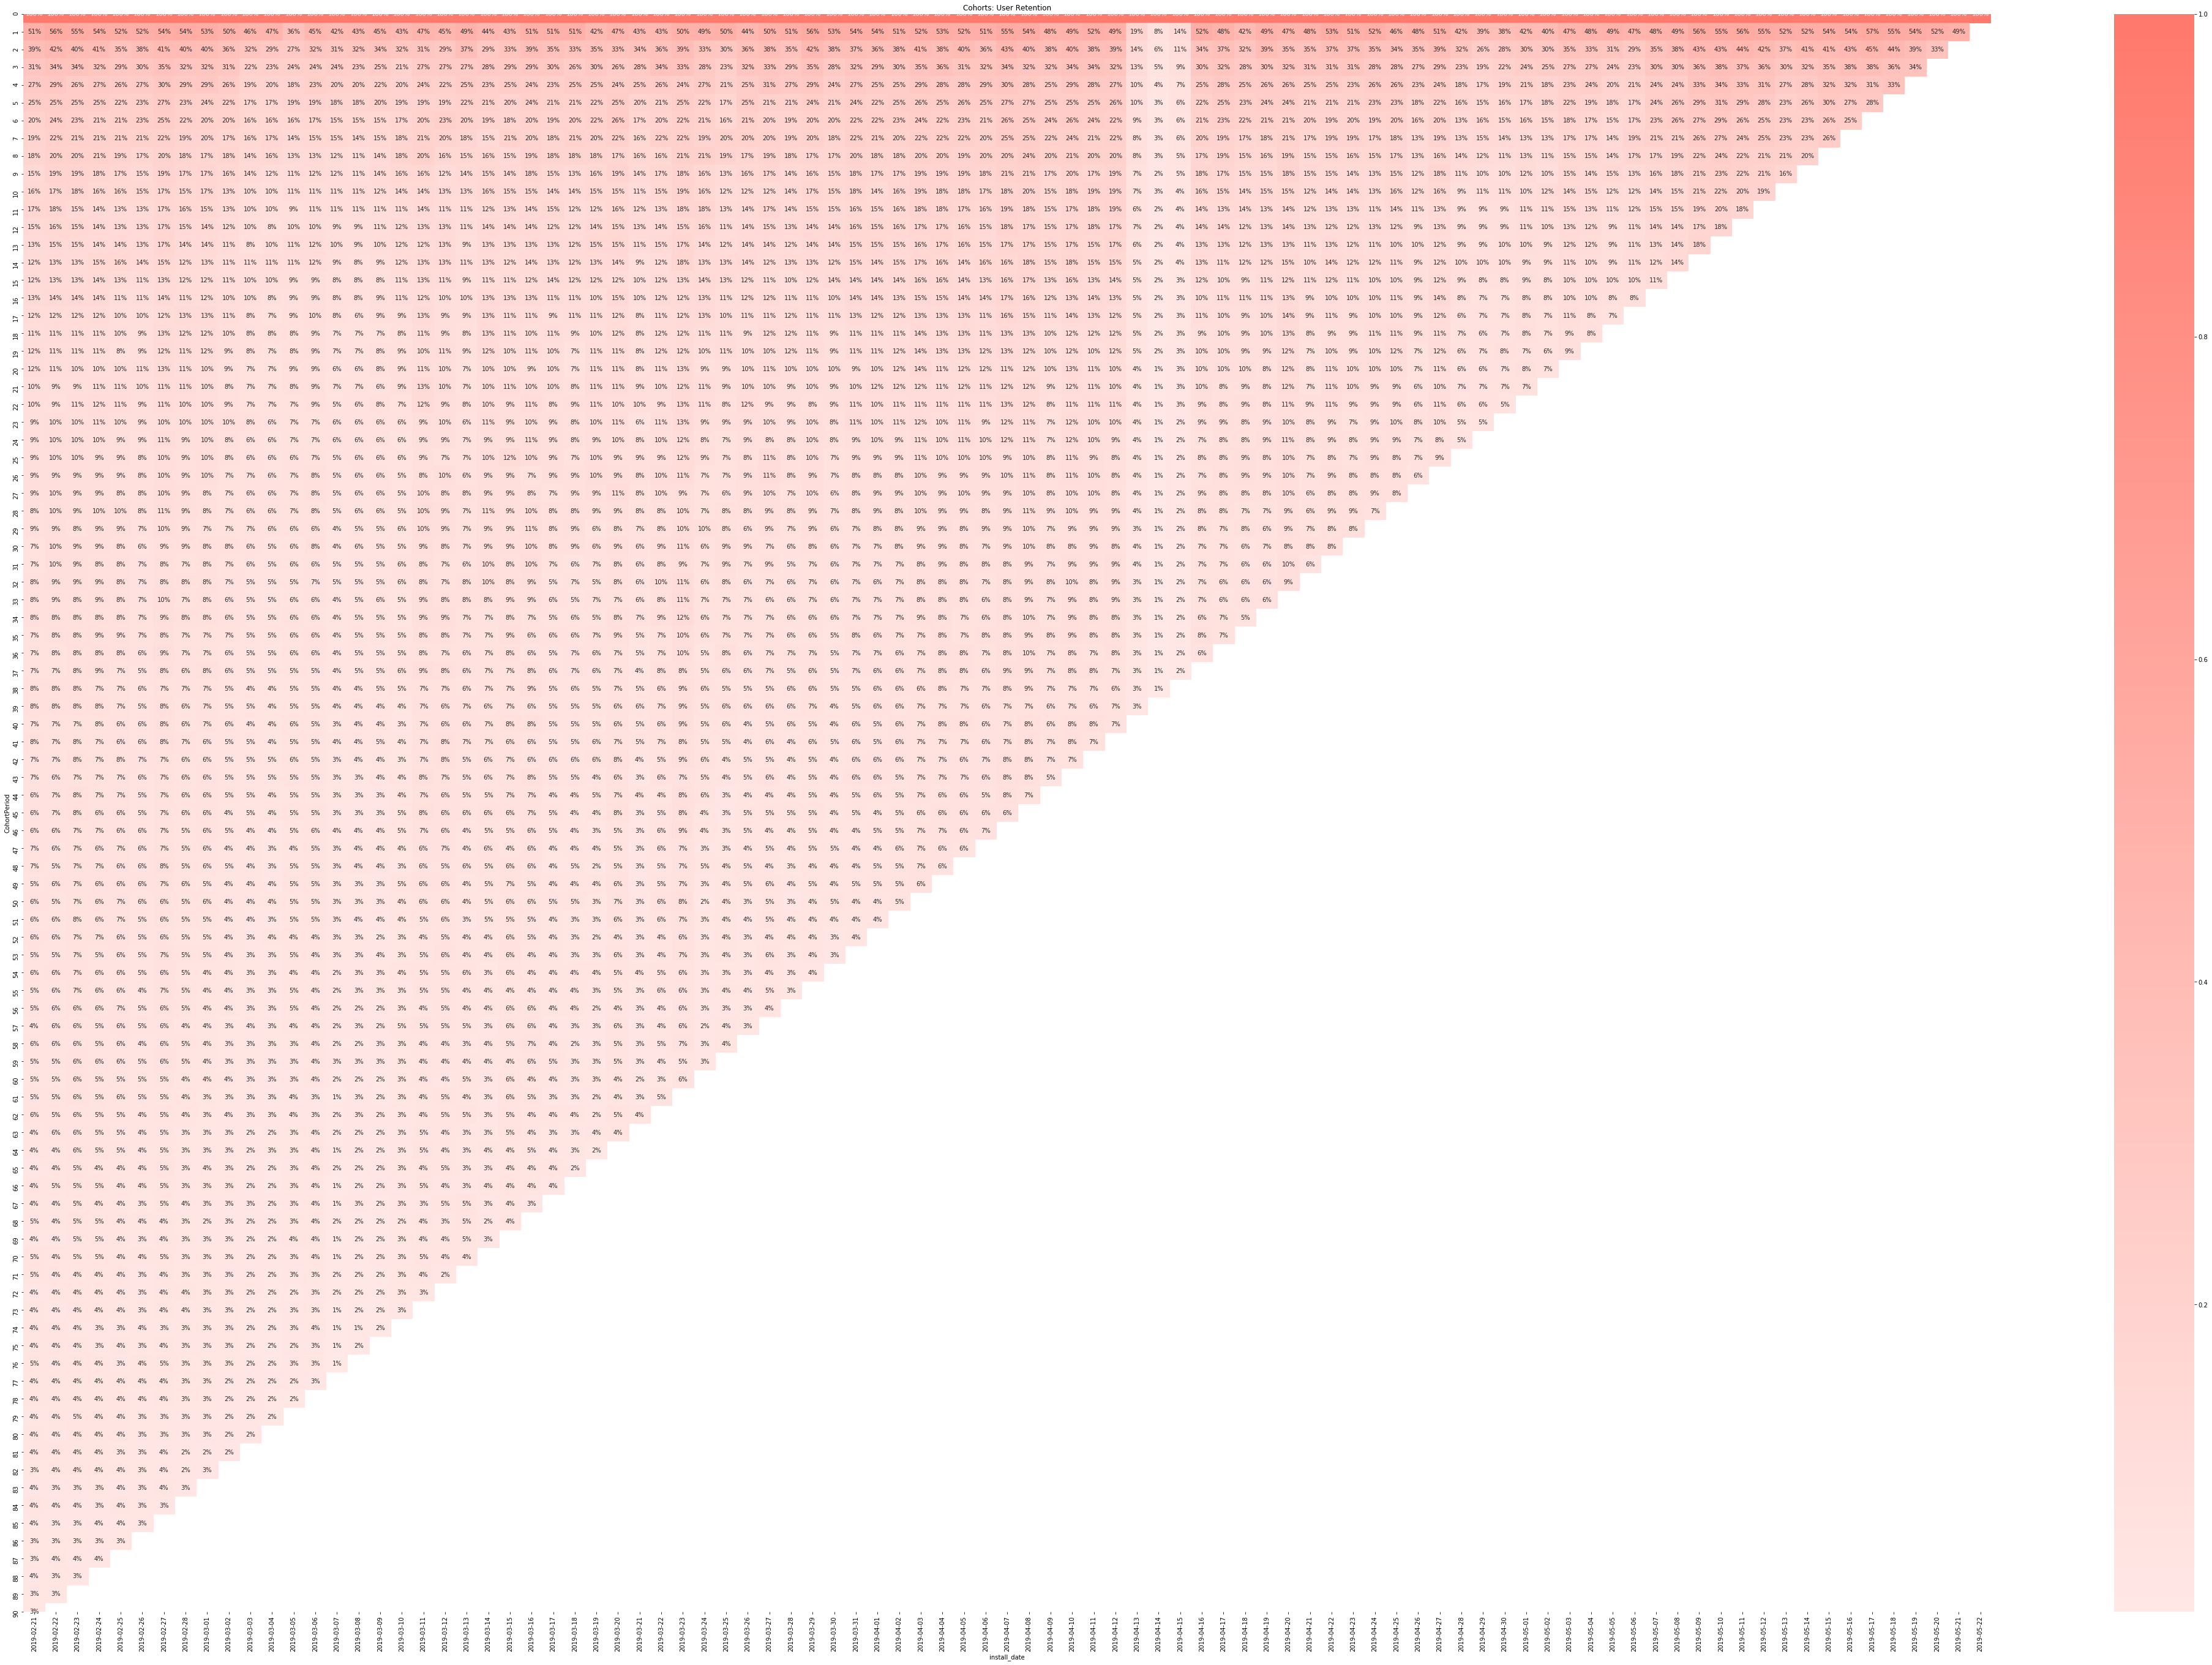

In [15]:
#show the retention rates
import seaborn as sns
colormap=sns.light_palette("#ff796c",as_cmap=True, reverse=False)

plt.figure(figsize=(72,48))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);

In [16]:
#Calculate avg retention rates to use in lifetime prediction
Retention=user_retention.mean().to_frame(name='Retention').reset_index()
Retention

,CohortPeriod,Retention
0,0,1.00
1,1,0.48
2,2,0.35
3,3,0.29
4,4,0.25
...,...,...
86,86,0.03
87,87,0.03
88,88,0.03
89,89,0.03


In [17]:
Retention.to_excel (r'C:\Users\Snow\Desktop\sa_data_test\Bruteville.xlsx', index = True, header=True)